### Packages and Import

In [1]:
### Importing packages for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

df = pd.read_csv("bikers_semi_final_v2.csv")

### Replacing NA with Unknown

In [2]:
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df = df.fillna("Unknown")

In [4]:
for col in df.columns:
    count = (df[col] == 'Unknown').sum()
    print(f"{col}: {count}")

INJURY_BAD: 2
HELMET_USED: 1051
age_bins: 1550
SAFE_PEDAL_ACTION: 1195
PROTECTIVE_CLOTHING: 2
SAFE_LOCATION: 499
WEATHER_CAT: 271
road_surf_bins: 583
DAYTIME: 0
SPEED_RATING: 0
UNSAFE_ACTION: 8379
DRIVER_BLIND: 3936
cause_bins: 4708
driver_maneuver_bins: 4432
physical_bins: 190
hour_bins: 0
SEX: 145


### Dropping 'UNSAFE_ACTION' and dropping unknowns in other columns

In [5]:
df2 = df.drop(columns=['UNSAFE_ACTION'])

In [6]:
df2 = df2[~(df2 == 'Unknown').any(axis=1)]

In [7]:
df2['INJURY_BAD'] = df2['INJURY_BAD'].astype(float)
df2['HELMET_USED'] = df2['HELMET_USED'].astype(float)
df2['PROTECTIVE_CLOTHING'] = df2['PROTECTIVE_CLOTHING'].astype(float)
df2['SAFE_LOCATION'] = df2['SAFE_LOCATION'].astype(float)
df2['DRIVER_BLIND'] = df2['DRIVER_BLIND'].astype(float)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 0 to 10384
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INJURY_BAD            2124 non-null   float64
 1   HELMET_USED           2124 non-null   float64
 2   age_bins              2124 non-null   object 
 3   SAFE_PEDAL_ACTION     2124 non-null   object 
 4   PROTECTIVE_CLOTHING   2124 non-null   float64
 5   SAFE_LOCATION         2124 non-null   float64
 6   WEATHER_CAT           2124 non-null   object 
 7   road_surf_bins        2124 non-null   object 
 8   DAYTIME               2124 non-null   int64  
 9   SPEED_RATING          2124 non-null   object 
 10  DRIVER_BLIND          2124 non-null   float64
 11  cause_bins            2124 non-null   object 
 12  driver_maneuver_bins  2124 non-null   object 
 13  physical_bins         2124 non-null   object 
 14  hour_bins             2124 non-null   object 
 15  SEX                 

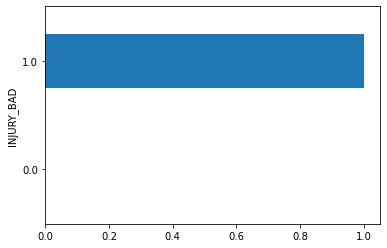

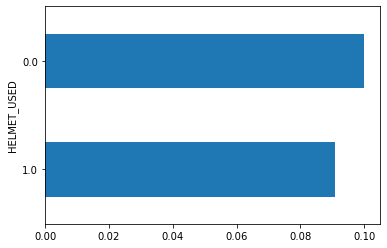

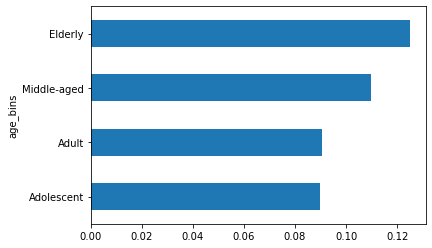

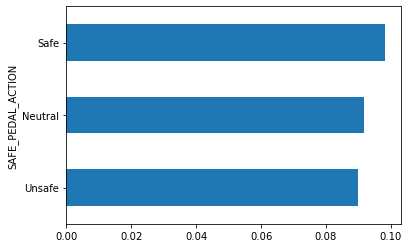

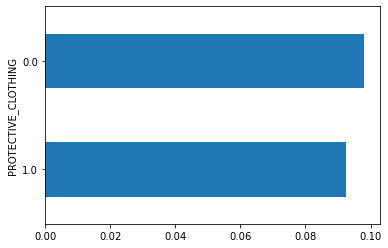

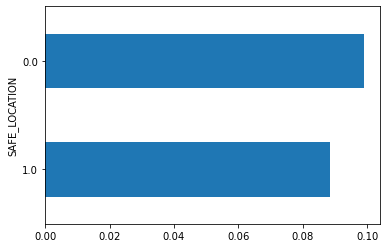

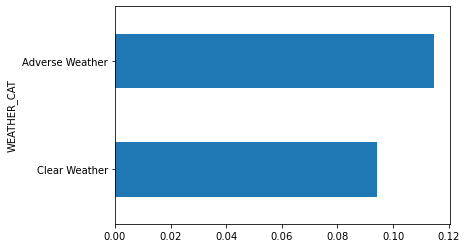

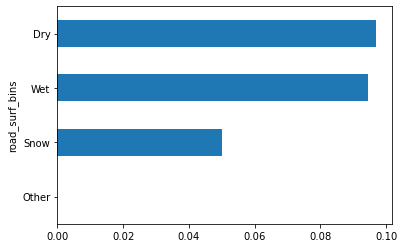

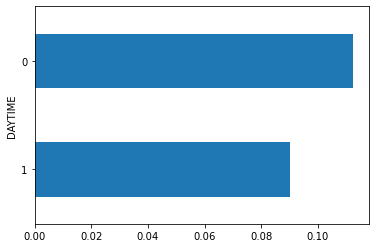

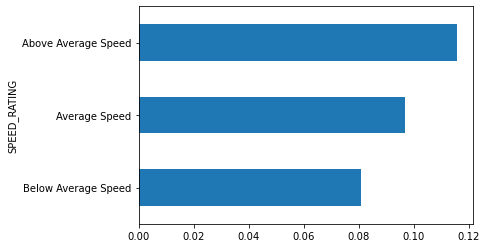

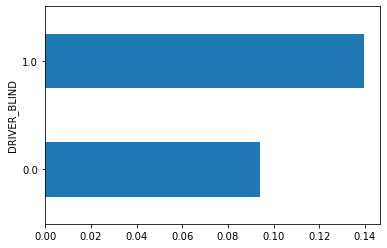

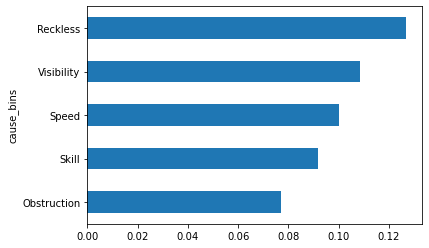

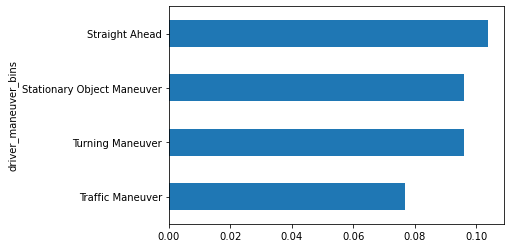

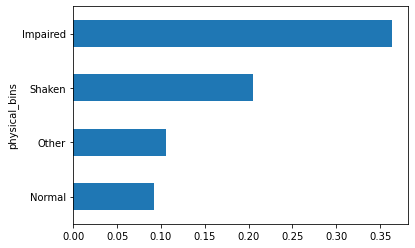

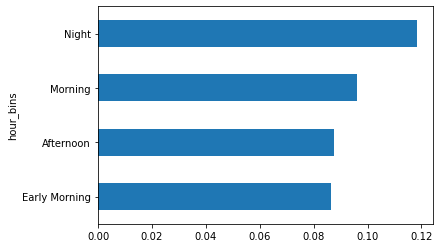

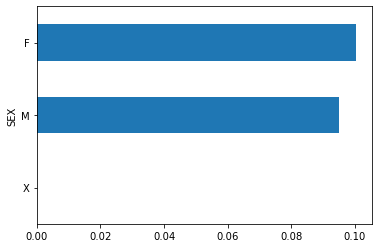

In [9]:
for col in df2.columns:
    df2.groupby(by=[col])['INJURY_BAD'].mean().sort_values().plot(kind='barh');
    plt.show()

### Dropping additional columns and dropping unknowns in other columns

In [10]:
df3 = df.drop(columns=['UNSAFE_ACTION', 'DRIVER_BLIND', 'cause_bins', 'driver_maneuver_bins'])

In [11]:
df3 = df3[~(df3 == 'Unknown').any(axis=1)]

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6807 entries, 0 to 10393
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   INJURY_BAD           6807 non-null   object
 1   HELMET_USED          6807 non-null   object
 2   age_bins             6807 non-null   object
 3   SAFE_PEDAL_ACTION    6807 non-null   object
 4   PROTECTIVE_CLOTHING  6807 non-null   object
 5   SAFE_LOCATION        6807 non-null   object
 6   WEATHER_CAT          6807 non-null   object
 7   road_surf_bins       6807 non-null   object
 8   DAYTIME              6807 non-null   int64 
 9   SPEED_RATING         6807 non-null   object
 10  physical_bins        6807 non-null   object
 11  hour_bins            6807 non-null   object
 12  SEX                  6807 non-null   object
dtypes: int64(1), object(12)
memory usage: 744.5+ KB


In [13]:
df3['INJURY_BAD'] = df3['INJURY_BAD'].astype(float)
df3['HELMET_USED'] = df3['HELMET_USED'].astype(float)
df3['PROTECTIVE_CLOTHING'] = df3['PROTECTIVE_CLOTHING'].astype(float)
df3['SAFE_LOCATION'] = df3['SAFE_LOCATION'].astype(float)

In [14]:
df3['INJURY_BAD'].value_counts()

0.0    6096
1.0     711
Name: INJURY_BAD, dtype: int64

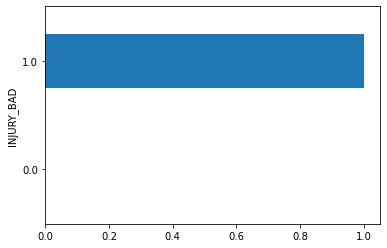

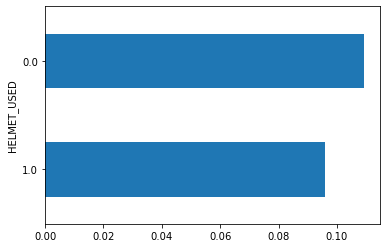

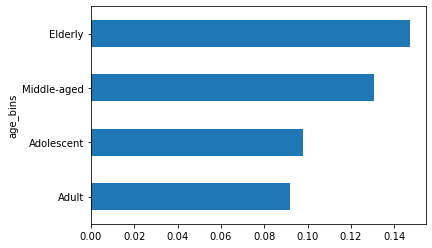

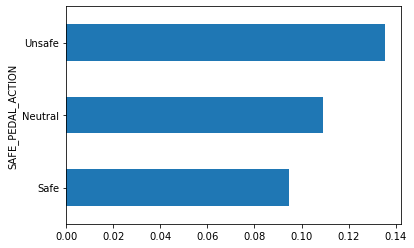

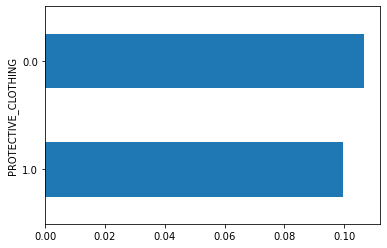

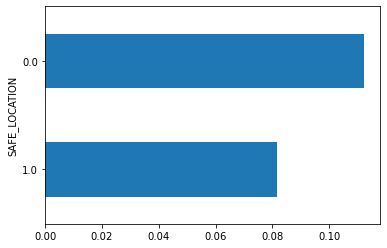

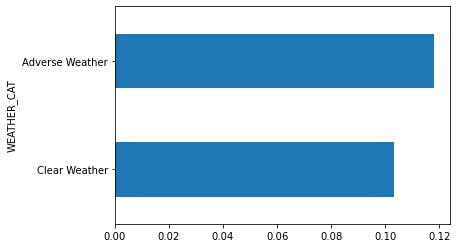

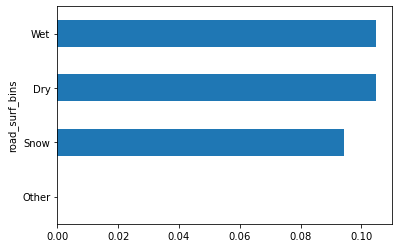

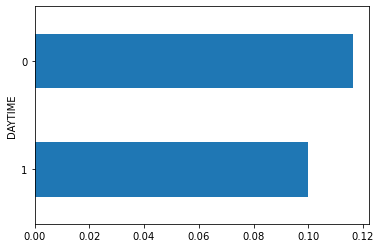

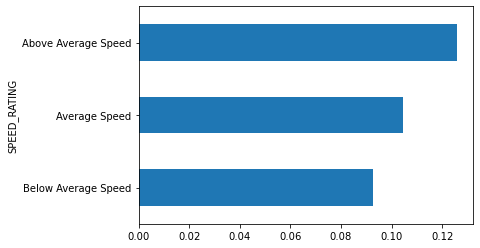

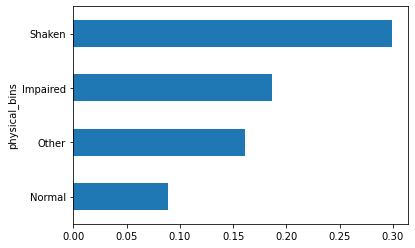

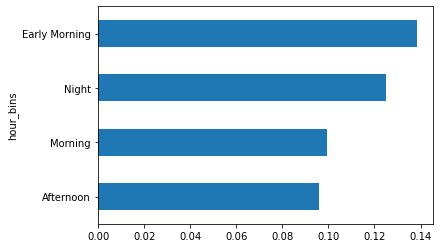

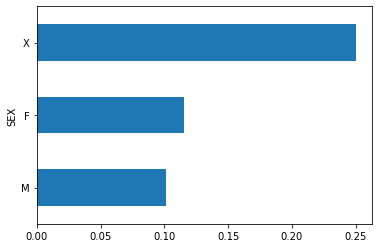

In [15]:
for col in df3.columns:
    df3.groupby(by=[col])['INJURY_BAD'].mean().sort_values().plot(kind='barh');
    plt.show()

### Makin sum dang csvs

In [18]:
df2.to_csv("small_data.csv")
df3.to_csv("big_data.csv")